# Testing the usefulness of FFT for digit recognition
Inital classification approach taken from Scikit-learn Hand-written digit recognizion example using support vector machine calassifier http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html applied for MNIST dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
from sklearn import datasets, svm, metrics, utils

Fetching the MNIST dataset

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./data')

It's 70000 examples of handwritten digits of size 28x28 pixels, labeled from 0 to 9.

The data is ordered and needs to be shuffled

In [4]:
mnist.data, mnist.target = utils.shuffle(mnist.data, mnist.target)

Pick the first 15 images for visualization

In [5]:
n_samples = len(mnist.data)

<IPython.core.display.Javascript object>


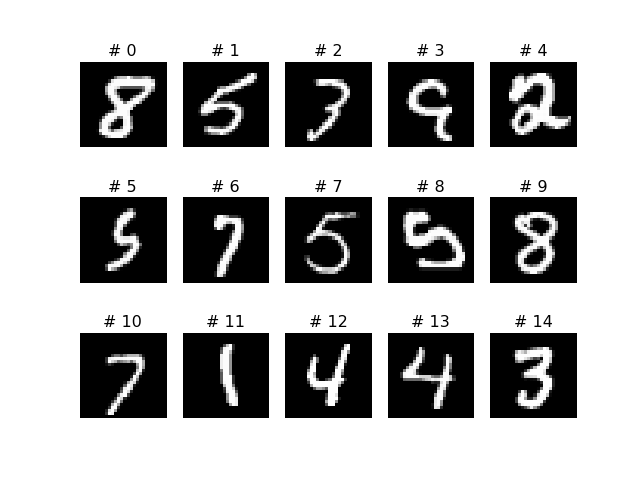

In [6]:
fig = plt.figure()
for i in range(15):
    img = mnist.data[i].reshape(28, 28)
    
    ax = fig.add_subplot(3, 5, i+1)
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title('# {}'.format(i))
    

Creating a support vector classifier

In [25]:
# gamma = 0.001, which was in the example for 8x8 images, seems to 
# heavily overfit 28x28 MNIST data with N=10000 samples, predicts only 1
#classifier = svm.SVC(gamma=0.001)
# TODO: There must be a bug!
classifier = svm.SVC()

Apply learning on the first half of the digits

In [21]:
N = n_samples//2
N = 10000
classifier.fit(mnist.data[:N], mnist.target[:N])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Predictions

In [22]:
expected = mnist.target[N:2*N]
predicted = classifier.predict(mnist.data[N:2*N])

Scikit-learn SVM doesn't seem to be of the fastest kind, need to check parameters.
* Doesn't appear to be memory problem that it stalls at 35000 samples in this case. 10000 samples was in a minute or few.
* May try more optimized learning approach.

In [11]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       995
        1.0       0.11      1.00      0.20      1141
        2.0       0.00      0.00      0.00      1010
        3.0       0.00      0.00      0.00       987
        4.0       0.00      0.00      0.00       980
        5.0       0.00      0.00      0.00       896
        6.0       0.00      0.00      0.00      1015
        7.0       0.00      0.00      0.00      1051
        8.0       0.00      0.00      0.00       925
        9.0       0.00      0.00      0.00      1000

avg / total       0.01      0.11      0.02     10000


Confusion matrix:
[[   0  995    0    0    0    0    0    0    0    0]
 [   0 1141    0    0    0  

/usr/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
expected, predicted

(array([ 0.,  7.,  5., ...,  5.,  9.,  0.]),
 array([ 1.,  1.,  1., ...,  1.,  1.,  1.]))

In [24]:
np.unique(predicted)

array([ 1.])

In [14]:
expected = mnist.target[:N]
predicted = classifier.predict(mnist.data[:N])

In [19]:
mnist.data[N:2*N].shape

(10000, 784)